As per our eda notebook, we need to clean the dataset accordingly

In [1]:
import pandas as pd

df=pd.read_csv('../data/insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [2]:
df.drop_duplicates(inplace=True)

to keep the model unbiased we need to drop duplicates 

<Axes: xlabel='charges', ylabel='Count'>

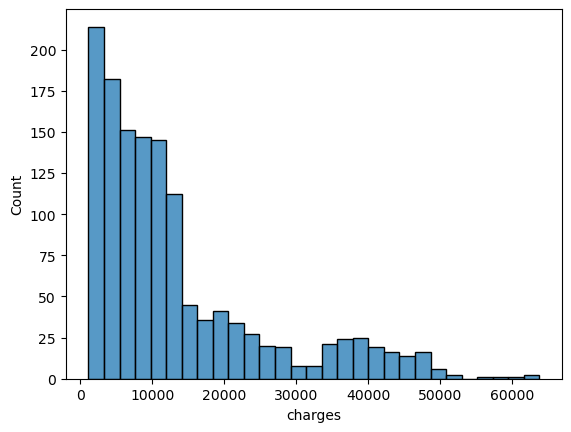

In [3]:
import seaborn as sns

sns.histplot(df['charges'])

<Axes: xlabel='charges', ylabel='Count'>

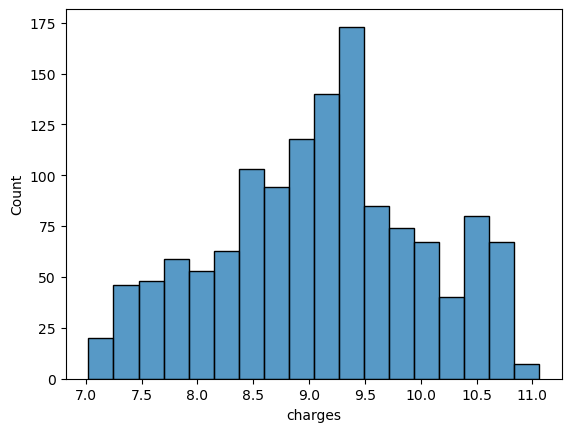

In [4]:
import numpy as np

df['charges']=np.log1p(df['charges'])
sns.histplot(df['charges'])


The original charges distribution was heavily right-skewed (lots of low values, few very high ones).
To fix that, I applied a log transformation 

In [5]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})


In [6]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

In [7]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)

those where the catogorical vlaues in our dataset.to train it i coverted it to numerical

In [8]:
df['smoker_bmi']=df['smoker']*df['bmi']
print(df['smoker_bmi'])

0       27.90
1        0.00
2        0.00
3        0.00
4        0.00
        ...  
1333     0.00
1334     0.00
1335     0.00
1336     0.00
1337    29.07
Name: smoker_bmi, Length: 1337, dtype: float64


In [9]:
df['smoker_children']=df['smoker']*df['children']
print(df['smoker_children'].sort_values(ascending=False))

1085    5
494     4
1307    4
621     4
301     3
       ..
1317    0
1318    0
1319    0
1320    0
1306    0
Name: smoker_children, Length: 1337, dtype: int64


as we studied the dataset Smoker status heavily influences charges. so I decided to create interaction features to let models capture deeper patterns

In [10]:
df.to_csv('../data/cleaned.csv')